# MNIST Autoencoder
### Directives
* Create the autoencoders using the functional API described below, you can play with the topology, those are just starting points
* Use GPU runtime
* Print 10 inputs and their associated outputs
* Don't forget to normalize your data
* Use the Functional API for Keras

### Autoencoders to build
1. Stacked 784 - 392 - 196 - 392 - 784 (tied weights or not)
2. Convolutional Encoder (conv, maxpool, conv, maxpool, conv, maxpool). Decoder (conv, upsample2d, conv, upsample2d, conv, upsample2d, conv)
3. Optional : GAN or VAE


In [1]:
# Choose Python 3 runtime
!pip install tensorflow==2.7.0


     |████████████████████████████████| 489.6 MB 21 kB/s 
     |████████████████████████████████| 1.3 MB 32.7 MB/s 
     |████████████████████████████████| 463 kB 56.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0+zzzcolab20220506162203
    Uninstalling tensorflow-2.8.0+zzzcolab20220506162203:
      Successfully uninstalled tensorflow-2.8.0+zzzcolab20220506162203


In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)


In [3]:
from tensorflow import keras

In [4]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(X_train, _), (X_test, _) = mnist.load_data()
all_data = np.concatenate((X_train, X_test))
all_data.shape

11501568/11490434 [==============================] - 0s 0us/step


(70000, 28, 28)

In [5]:
#standardise data
all_data = all_data/255.0
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
all_data.shape

(70000, 28, 28)

In [6]:
def print_first_9(data):
  fig = plt.figure()
  for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(data[i], interpolation='none')
    plt.title("Digit: {}".format(i))
    plt.xticks([])
    plt.yticks([])

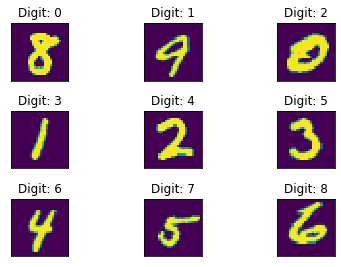

In [7]:
print_first_9(all_data[-9:])

# Stacked Autoencoder

In [41]:
from pyparsing import actions
model = keras.models.Sequential([
                                 
                                 keras.layers.Flatten(input_shape = (28,28)),
                                 keras.layers.Dense(392, activation = 'relu'),
                                 keras.layers.Dense(196, activation = 'relu'),
                                 keras.layers.Dense(392, activation = 'relu'),
                                 keras.layers.Dense(28*28, activation = 'sigmoid'),
                                 keras.layers.Reshape((28,28))
                                         
])


In [42]:
model.compile(optimizer='nadam', loss='binary_crossentropy')

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 392)               307720    
                                                                 
 dense_13 (Dense)            (None, 196)               77028     
                                                                 
 dense_14 (Dense)            (None, 392)               77224     
                                                                 
 dense_15 (Dense)            (None, 784)               308112    
                                                                 
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 770,084
Trainable params: 770,084
Non-tr

In [47]:
history = model.fit(all_data, all_data,
                epochs=30,
                batch_size=256,
                shuffle=True)

Epoch 1/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1308
Epoch 2/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1239
Epoch 3/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1182
Epoch 4/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1135
Epoch 5/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1097
Epoch 6/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1066
Epoch 7/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1037
Epoch 8/30
274/274 [==============================] - 3s 10ms/step - loss: 0.1011
Epoch 9/30
274/274 [==============================] - 3s 10ms/step - loss: 0.0986
Epoch 10/30
274/274 [==============================] - 3s 10ms/step - loss: 0.0962
Epoch 11/30
274/274 [==============================] - 3s 10ms/step - loss: 0.0940
Epoch 12/30
274/274 [==============================] - 3s 10ms/step - loss: 0.0918
Epoch 13/30
2

In [8]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [9]:
def show_reconstructions(model, images=X_test, n_images=9):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 [==============================] - 0s 85ms/step


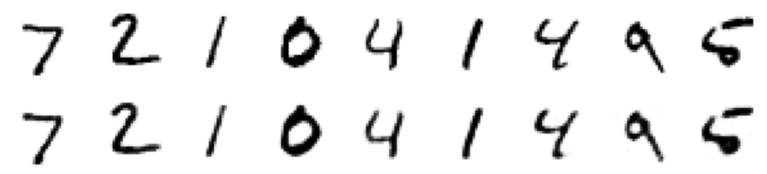

In [50]:
show_reconstructions(model)

# Convolutional Autoencoder

In [8]:
keras.backend.clear_session()


In [6]:

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])

conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer='nadam'
                )
history = conv_ae.fit(all_data, all_data, epochs=5)

Epoch 1/5
2188/2188 [==============================] - 102s 46ms/step - loss: 0.1135
Epoch 2/5
2188/2188 [==============================] - 97s 44ms/step - loss: 0.0799
Epoch 3/5
2188/2188 [==============================] - 102s 47ms/step - loss: 0.0751
Epoch 4/5
2188/2188 [==============================] - 103s 47ms/step - loss: 0.0726
Epoch 5/5
2188/2188 [==============================] - 102s 46ms/step - loss: 0.0709


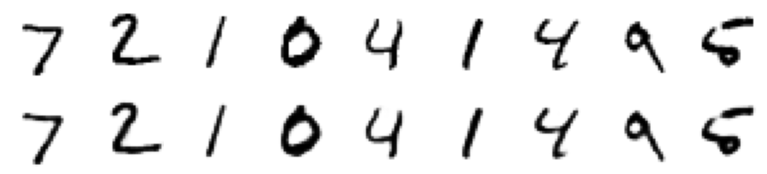

In [10]:
show_reconstructions(conv_ae)